<a href="https://colab.research.google.com/github/Gusta02/Perdas_de_clientes_machine_learning/blob/main/Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# importaçõpes

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy


In [4]:
# importando o arquivo

from google.colab import files
arquivo = files.upload()

Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn (1).csv


link do arquivo (https://www.kaggle.com/blastchar/telco-customer-churn/version/1)

In [8]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [9]:
df_vai = df.iloc[:10]
df_vai

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [11]:
# retirar o campo customerID
df.drop('customerID', 1, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [12]:
# Verificar tipos
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [14]:
# Altera TotalCharges

df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')

In [15]:
# verifica vazios

df.TotalCharges.isna()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [17]:
# ver campos vazios

df[df.TotalCharges.isna()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [19]:
# exclusao dos campos vazios de TotalCharges

df.dropna(subset=['TotalCharges'], inplace=True)

In [20]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


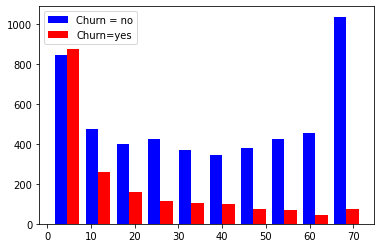

In [22]:
# grafico analise de temure

dfno = df[df.Churn == 'No'].tenure
dfyes = df[df.Churn == 'Yes'].tenure

plt.hist([dfno, dfyes], color=['blue', 'red'], label=['Churn = no', 'Churn=yes'])
plt.legend()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


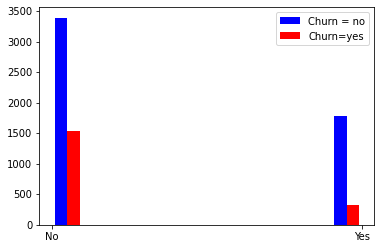

In [24]:
# grafico dependentes

dfno = df[df.Churn == 'No'].Dependents
dfyes = df[df.Churn == 'Yes'].Dependents

plt.hist([dfno, dfyes], color=['blue', 'red'], label=['Churn = no', 'Churn=yes'])
plt.legend()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


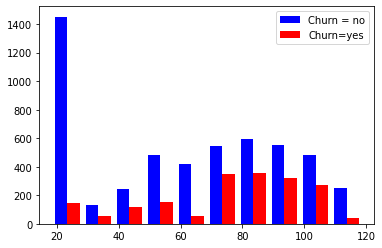

In [26]:
#  grafico de MonthlyCharges


dfno = df[df.Churn == 'No'].MonthlyCharges
dfyes = df[df.Churn == 'Yes'].MonthlyCharges

plt.hist([dfno, dfyes], color=['blue', 'red'], label=['Churn = no', 'Churn=yes'])
plt.legend()

NO: 5163YES: 1869  % No: 26.58


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


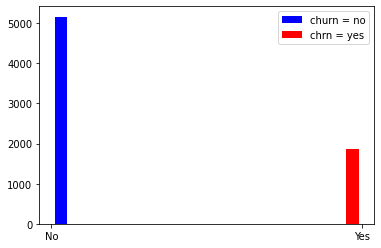

In [28]:
# Balanceamento do dataset

dfno = df[df.Churn == 'No'].Churn
dfyes = df[df.Churn == 'Yes'].Churn

total = dfno.count() + dfyes.count()
parcent = round((dfyes.count() / total) *100, 2)

print(f'NO: {dfno.count()}' f'YES: {dfyes.count()}', f' % No: {parcent}')

plt.hist([dfno, dfyes], color=['blue', 'red'], label=['churn = no', 'chrn = yes'])
plt.legend()

In [30]:
# verifica padrão

for i in df:
  if df[i].dtypes == 'object':
    print(f'{i} : {df[i].unique()}')

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [31]:
df.replace('No internet service', 'No', inplace=True)
df.replace('No phone service', 'No', inplace=True)

In [32]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [34]:
dfnum = pd.get_dummies(data=df, columns=['gender', 'InternetService', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'])
dfnum.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'gender_Female', 'gender_Male', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No', 'Partner_No',
       'Partner_Yes', 'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_Yes', 'TechSupport_No', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_Yes', 'StreamingMovies_No',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaperlessBilling_No', 'PaperlessBilling_Yes',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_

In [35]:
dfnum.sample(5)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2392,0,20,90.70,1781.35,No,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,0,1,0,0
5930,0,72,84.70,6185.15,No,1,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,1,1,0,1,0,0,1,1,0,1,0,0,0,1,0,1,1,0,0,0
6814,1,57,94.00,5438.95,No,1,0,0,1,0,0,1,1,0,0,1,0,1,0,1,0,1,0,0,1,0,1,1,0,1,0,0,1,1,0,0,1,0,0,1,0,0
2559,0,72,115.55,8425.30,No,0,1,0,1,0,0,1,1,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,0,1,0
2817,0,41,20.65,875.55,No,1,0,0,0,1,0,1,1,0,0,1,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,1,0,0,1,0,0


In [53]:
# label Encoder

le = LabelEncoder()
dfnum['Churn'] = le.fit_transform(dfnum['Churn'])
dfnum.Churn.sample(15)

2076    0
3813    0
2859    0
752     0
4446    1
1333    0
4331    0
6006    0
5915    0
3970    0
2995    0
5504    1
1096    0
5387    0
755     1
Name: Churn, dtype: int64

In [54]:
scaler = MinMaxScaler()
dfnum[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(dfnum[['tenure', 'MonthlyCharges', 'TotalCharges']])
dfnum.sample(5)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6136,0,0.633803,0.019900,0.100571,0,1,0,0,0,1,0,1,0,1,0,1,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,1,0,1,0,0,0
1167,0,0.352113,0.331343,0.147311,0,0,1,1,0,0,1,0,1,0,0,1,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0
5939,0,0.239437,0.152736,0.061337,0,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,0,0,1,1,0,0,1,1,0,1,0,1,0,1,0,0,1,0,0,0,0,1
863,0,0.028169,0.764677,0.033303,1,1,0,0,1,0,1,0,1,0,0,1,1,0,0,1,0,1,0,0,1,1,0,1,0,0,1,0,1,1,0,0,0,1,0,0,1,0
5138,1,0.985915,0.881095,0.877498,0,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0,1,1,0,0,1,0,1,0,1,0,0,1,0,1,0,0,1,0


In [55]:
# separar features e labels
features = dfnum.drop(['Churn'], 1)
label = dfnum['Churn']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [56]:
# parte para valida~ção

val = features.head(10)
val

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0.000000,0.115423,0.001275,1,0,1,0,0,0,1,1,0,1,0,1,0,1,0,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,1,0
1,0,0.464789,0.385075,0.215867,0,1,1,0,0,1,0,1,0,0,1,1,0,1,0,0,0,1,1,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1
2,0,0.014085,0.354229,0.010310,0,1,1,0,0,1,0,1,0,0,1,1,0,1,0,0,0,1,0,1,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,1
3,0,0.619718,0.239303,0.210241,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,0,0,1,1,0,0,1,0,1,1,0,1,0,0,1,0,1,0,1,0,0,0
4,0,0.014085,0.521891,0.015330,1,0,0,1,0,1,0,1,0,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,1,0
5,0,0.098592,0.809950,0.092511,1,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,0,1,0,1,1,0,0,0,1,0,0,1,0
6,0,0.295775,0.704975,0.222779,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,0,1,1,0,1,0,0,0,1,0,1,0,0
7,0,0.126761,0.114428,0.032668,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,1
8,0,0.380282,0.861194,0.349325,1,0,0,1,0,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,1,0,0,0,1,0,0,1,0
9,0,0.859155,0.377114,0.400317,0,1,1,0,0,1,0,0,1,0,1,1,0,1,0,0,0,1,0,1,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0


In [57]:
# novo feature
features = features.iloc[10:]
label = label.iloc[10:]

In [61]:
# separa entre treinamento e test

X_train, X_test, y_train, y_teste = train_test_split(features,label, test_size=20, random_state=42)

In [63]:
print(X_train.shape, y_train.shape)

(7002, 41) (7002,)


In [50]:
model = Sequential([
                    Dense(20, input_shape=(41, ), activation='relu'),
                    Dense(52, activation='relu'),
                    Dense(1, activation='sigmoid')
])

# Passando parametro de execução
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [64]:
# treinamento

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
219/219 [==============================] - 1s 2ms/step - loss: 0.4703 - accuracy: 0.7691
Epoch 2/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4252 - accuracy: 0.7961
Epoch 3/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4207 - accuracy: 0.7993
Epoch 4/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4168 - accuracy: 0.8009
Epoch 5/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4155 - accuracy: 0.8001
Epoch 6/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4141 - accuracy: 0.8056
Epoch 7/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4112 - accuracy: 0.8043
Epoch 8/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4113 - accuracy: 0.8048
Epoch 9/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4106 - accuracy: 0.8063
Epoch 10/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4098 - accura

In [67]:
pred_val = model.predict(val)
print(pred_val)

[[0.2938998 ]
 [0.01112995]
 [0.6065265 ]
 [0.00158897]
 [0.72988176]
 [0.96542066]
 [0.294286  ]
 [0.10914099]
 [0.39959487]
 [0.02498212]]


In [69]:
y_pred = []
for i in pred_val:
  if i > 0.5: 
    y_pred.append(1)
  else:
    y_pred.append(0)

cliente = df_vai['customerID']
real = df_vai['Churn']
pred = list(pred_val.flatten())

df = pd.DataFrame({'cliente': cliente, 'previsao':pred, 'real':real, 'churn': y_pred})

print(df)

      cliente  previsao real  churn
0  7590-VHVEG  0.293900   No      0
1  5575-GNVDE  0.011130   No      0
2  3668-QPYBK  0.606526  Yes      1
3  7795-CFOCW  0.001589   No      0
4  9237-HQITU  0.729882  Yes      1
5  9305-CDSKC  0.965421  Yes      1
6  1452-KIOVK  0.294286   No      0
7  6713-OKOMC  0.109141   No      0
8  7892-POOKP  0.399595  Yes      0
9  6388-TABGU  0.024982   No      0


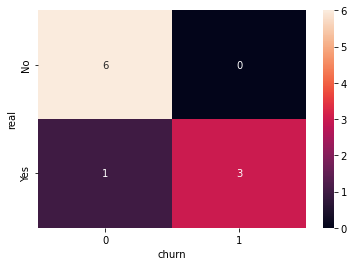

In [71]:
import seaborn as sns

df = pd.DataFrame(df, columns=['real', 'churn'])
confusion_matrix = pd.crosstab(df['real'], df['churn'], rownames=['real'], colnames=['churn'])

sns.heatmap(confusion_matrix, annot=True)